In [19]:
import pandas as pd
import train

df = pd.read_csv('../venvx/AnnonymData.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538739 entries, 0 to 6538738
Data columns (total 14 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrderId        int64 
 1   TransactionId  object
 2   DateOfService  object
 3   DateOfOrder    object
 4   OrderQty       int64 
 5   MenuName       object
 6   MenuPrice      object
 7   MenuSubsidy    object
 8   BookingNr      object
 9   GroupName      object
 10  CanceledQty    int64 
 11  DateOfCancel   object
 12  Site           object
 13  SchoolID       object
dtypes: int64(3), object(11)
memory usage: 698.4+ MB


In [21]:
# import numpy as np
df2 = df
# # df2 = reduce_mem_usage(df)
# df2.info()

In [22]:
df

,OrderId,TransactionId,DateOfService,DateOfOrder,OrderQty,MenuName,MenuPrice,MenuSubsidy,BookingNr,GroupName,CanceledQty,DateOfCancel,Site,SchoolID
0,11518978,4c5060636f584ef9a1effa77282755f5,2020-01-02,2020-02-05 11:54:08,1,Mittagessen (Gs),"3,10","0,00",349-88220481,"xxx3,45€ normal 5T (68€)",0,NaN,LP,SCH001
1,11285143,68472c70b9c84fb784834ecc257827d7,2020-01-02,2019-12-16 10:30:51,1,Smart Eating Buffet (WGrus),"0,00","3,50",248-141751492,Steinfurt Abo ermäßigt,0,NaN,BK,SCH002
2,11285146,7262eace0d104592b1269e38f5b45ec1,2020-01-02,2019-12-16 10:31:33,1,Smart Eating Buffet (WGrus),"2,90","0,60",248-77489928,Westerkappeln Grundschüler Abo,0,NaN,BK,SCH002
3,11285152,8e451931e8fc4554869c3e4533b65e23,2020-01-02,2019-12-16 10:32:05,1,Smart Eating Buffet (WGrus),"0,00","3,50",248-77558043,Steinfurt Abo ermäßigt,0,NaN,BK,SCH002
4,11285155,bfa8fa0812ee40baa98e5aaf52d30e0b,2020-01-02,2019-12-16 10:32:31,1,Smart Eating Buffet (WGrus),"2,90","0,60",248-77420774,Westerkappeln Grundschüler Abo,0,NaN,BK,SCH002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538734,20946470,c66797e99f7d4684a249d2fde8e03d4d_order,2023-12-22,2023-11-14 15:11:29,1,Mittagessen,"0,00","3,75",721-161089197,"BuT (E,P)",0,NaN,MS,SCH087
6538735,21178498,cf8caf00f8fc4674ac8039562275c0fd_order,2023-12-22,2023-11-27 12:11:24,1,Mittagessen (KL),"3,70","0,00",349-163628248,"3,70 €",0,NaN,MS,SCH118
6538736,21178551,ade8ad875b904ef89fb82aefb4d089ea_order,2023-12-22,2023-11-27 12:11:31,1,Mittagessen (KL),"3,70","0,00",349-165661318,"3,70 €",0,NaN,MS,SCH118
6538737,20813304,aff36ccda0994927809bd927923faac7_order,2023-12-22,2023-11-14 09:02:57,0,Mittagessen Outlaw,"0,00","3,55",800-177887775,Steinfurt ermäßigt,1,2023-11-21 15:21:26,MS,SCH099


In [23]:
#df.columns.dtype
#df.isna().sum()
#print(df.dtypes)

df['DateOfOrder'] = pd.to_datetime(df['DateOfOrder'])
df3 = df.set_index('DateOfOrder').sort_index()
df['Date'] = pd.to_datetime(df['DateOfOrder']).dt.date
df['time'] = pd.to_datetime(df['DateOfOrder']).dt.strftime('%H:%M:%S')

df['DateOfOrder'] = df['DateOfOrder'].sort_index
#df['DateOfOrder'].info
#df['OrderId']
df3['day_of_year']=df2.index.day_of_year
#df2 = df2.drop('day_of_week',axis =1)
df3['weekday'] = df2.index.weekday+1
df3

df3.isna().sum()
###### maybe use a sentinel value (1970-1-1) for nan values in DateOfCancel







AttributeError: 'RangeIndex' object has no attribute 'day_of_year'

In [45]:
#import numpy as np
#df3['day_of_year'] = df3.index.day_of_year
#df3['day_of_week'] = df3.index.day_of_week +1
#df3['season'] = np.sin((df3['day_of_year']/365)*2*np.pi)
#df3['weekend'] = df3['day_of_week']

#for i in range(1,len(df3['day_of_week'])):
    #if df3['day_of_week'][i] == 5 or 6:
        #df3['weekend'][i]=1
    #else:
        #df3['weekend'][i]=0
#df3['weekend']
#######much more efficient
#df3['weekend'] = df3['day_of_week'].isin([6,7]).astype(int)

#df3['day_name'] = df3.index.day_name()
#df3['Cancel'] = df3['DateOfCancel'].isna().astype(int)
df3

             

,OrderId,TransactionId,DateOfService,OrderQty,MenuName,MenuPrice,MenuSubsidy,BookingNr,GroupName,CanceledQty,DateOfCancel,Site,SchoolID,day_of_year,day_of_week,season,weekend,day_name,Cancel
DateOfOrder,,,,,,,,,,,,,,,,,,,
2019-12-02 20:39:46,11161800,5fff5813ae674809a06e3b1fe5528fcf,2020-01-02,1,Mittagessen (BS),"3,05","0,00",474-136052114,Bad Sassendorf,0,NaN,LP,SCH003,336,1,-0.478734,0,Monday,1
2019-12-02 20:39:46,11161801,7c4f0e97356e46669abefe8dc5fb0ff0,2020-01-03,1,Mittagessen (BS),"3,05","0,00",474-136052114,Bad Sassendorf,0,NaN,LP,SCH003,336,1,-0.478734,0,Monday,1
2019-12-03 22:29:24,11166739,ee1d1a4a7458414a8bb420111ba0fa8c,2020-01-02,1,Mittagessen (BS),"3,05","0,00",474-136060130,Bad Sassendorf,0,NaN,LP,SCH003,337,2,-0.463550,0,Tuesday,1
2019-12-04 13:27:22,11169532,86497dc4e7434b838a335c439325fb65,2020-01-02,1,Mittagessen (BS),"3,05","0,00",474-136047096,Bad Sassendorf,0,NaN,LP,SCH003,338,3,-0.448229,0,Wednesday,1
2019-12-04 13:27:22,11169533,6054345ad0b14bd297dbdc6372ff1488,2020-01-03,1,Mittagessen (BS),"3,05","0,00",474-136047096,Bad Sassendorf,0,NaN,LP,SCH003,338,3,-0.448229,0,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-27 11:54:08,28525140,3afb68785a33434d8a5d33464e400d94_order,2023-12-14,1,Mittagessen (BK),"0,00","4,15",900-170863713,Hamm ermäßigt,0,NaN,BK,SCH139,240,2,-0.835925,0,Tuesday,1
2024-08-27 11:54:09,28525148,4ae5064b9fc24653becf25d6dca02cac_order,2023-12-15,1,Mittagessen (BK),"0,00","4,15",900-170863713,Hamm ermäßigt,0,NaN,BK,SCH139,240,2,-0.835925,0,Tuesday,1
2024-08-27 11:54:11,28525166,5a3c0717d64542ba95c10751b97be085_order,2023-12-18,1,Mittagessen (BK),"0,00","4,15",900-170863713,Hamm ermäßigt,0,NaN,BK,SCH139,240,2,-0.835925,0,Tuesday,1


In [75]:
from sklearn.model_selection import train_test_split

###### start fitting the model
#from sklearn.model_selection import train_test_split
#train = df3
#train.drop(['TransactionId','OrderId','DateOfService','BookingNr','DateOfCancel'],axis=1,inplace=True)
X = train.drop(['day_name','Cancel','CanceledQty'],axis=1)
y = train['Cancel']
X_temp,X_test,y_temp,y_test = train_test_split(X,y,test_size=0.1,random_state = 11,shuffle = False)
X_train,X_val,y_train,y_val = train_test_split(X_temp,y_temp,test_size=0.1,random_state = 11,shuffle = False)

In [70]:
X_train

,OrderQty,MenuName,MenuPrice,MenuSubsidy,GroupName,Site,SchoolID,day_of_year,day_of_week,season,weekend
DateOfOrder,,,,,,,,,,,
2019-12-02 20:39:46,1,Mittagessen (BS),"3,05","0,00",Bad Sassendorf,LP,SCH003,336,1,-0.478734,0
2019-12-02 20:39:46,1,Mittagessen (BS),"3,05","0,00",Bad Sassendorf,LP,SCH003,336,1,-0.478734,0
2019-12-03 22:29:24,1,Mittagessen (BS),"3,05","0,00",Bad Sassendorf,LP,SCH003,337,2,-0.463550,0
2019-12-04 13:27:22,1,Mittagessen (BS),"3,05","0,00",Bad Sassendorf,LP,SCH003,338,3,-0.448229,0
2019-12-04 13:27:22,1,Mittagessen (BS),"3,05","0,00",Bad Sassendorf,LP,SCH003,338,3,-0.448229,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-14 06:56:01,1,Mittagessen Outlaw,"0,00","3,55",Warendorf ermäßigt,MS,SCH126,257,4,-0.958718,0
2023-09-14 06:56:01,1,Mittagessen Outlaw,"0,00","3,55",Münster ermäßigt,MS,SCH135,257,4,-0.958718,0
2023-09-14 06:56:02,1,Mittagessen Outlaw,"0,00","3,55",Münster ermäßigt,MS,SCH135,257,4,-0.958718,0


In [ ]:
######Maybe for memeory reduction 
del train
del X
del y

In [76]:
######## xgboosting
import xgboost as xgb

model = xgb.XGBRegressor(device="cuda:0", early_stopping_round=10,enable_categorical=True)
model.fit(X_train,y_train,eval_set=[(X_val,y_val)],verbose=1)

[0]	validation_0-rmse:0.24363


/Users/sage/anaconda3/envs/bayesian_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:06:26] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/Users/sage/anaconda3/envs/bayesian_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:06:26] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-rmse:0.18355
[2]	validation_0-rmse:0.14558
[3]	validation_0-rmse:0.12225
[4]	validation_0-rmse:0.10891
[5]	validation_0-rmse:0.10164
[6]	validation_0-rmse:0.09831
[7]	validation_0-rmse:0.09640
[8]	validation_0-rmse:0.09542
[9]	validation_0-rmse:0.09499
[10]	validation_0-rmse:0.09477
[11]	validation_0-rmse:0.09465
[12]	validation_0-rmse:0.09465
[13]	validation_0-rmse:0.09468
[14]	validation_0-rmse:0.09466
[15]	validation_0-rmse:0.09466
[16]	validation_0-rmse:0.09465
[17]	validation_0-rmse:0.09464
[18]	validation_0-rmse:0.09465
[19]	validation_0-rmse:0.09465
[20]	validation_0-rmse:0.09466
[21]	validation_0-rmse:0.09482
[22]	validation_0-rmse:0.09482
[23]	validation_0-rmse:0.09481
[24]	validation_0-rmse:0.09483
[25]	validation_0-rmse:0.09488
[26]	validation_0-rmse:0.09488
[27]	validation_0-rmse:0.09489
[28]	validation_0-rmse:0.09490
[29]	validation_0-rmse:0.09490
[30]	validation_0-rmse:0.09493
[31]	validation_0-rmse:0.09493
[32]	validation_0-rmse:0.09494
[33]	validation_0

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda:0', early_stopping_round=10,
             early_stopping_rounds=None, enable_categorical=True,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [86]:
model.score(X_test,y_test)
#model_l.score(X_test,y_test)

0.7796928882598877

In [78]:
######lightgbm

from lightgbm import LGBMRegressor
model_l = LGBMRegressor( early_stopping_round=10,enable_categorical=True,verbose=50)
model_l.fit(X_train,y_train,eval_set=[(X_val,y_val)])


[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.805332
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.294818
[LightGBM] [Debug] init for col-wise cost 0.078991 seconds, init for row-wise cost 0.085804 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 1234
[LightGBM] [Info] Number of data points in the train set: 5296378, number of used features: 11
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Info] Start training from score 0.854812
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
Training until validation scores don't improve

LGBMRegressor(early_stopping_round=10, enable_categorical=True, verbose=50)

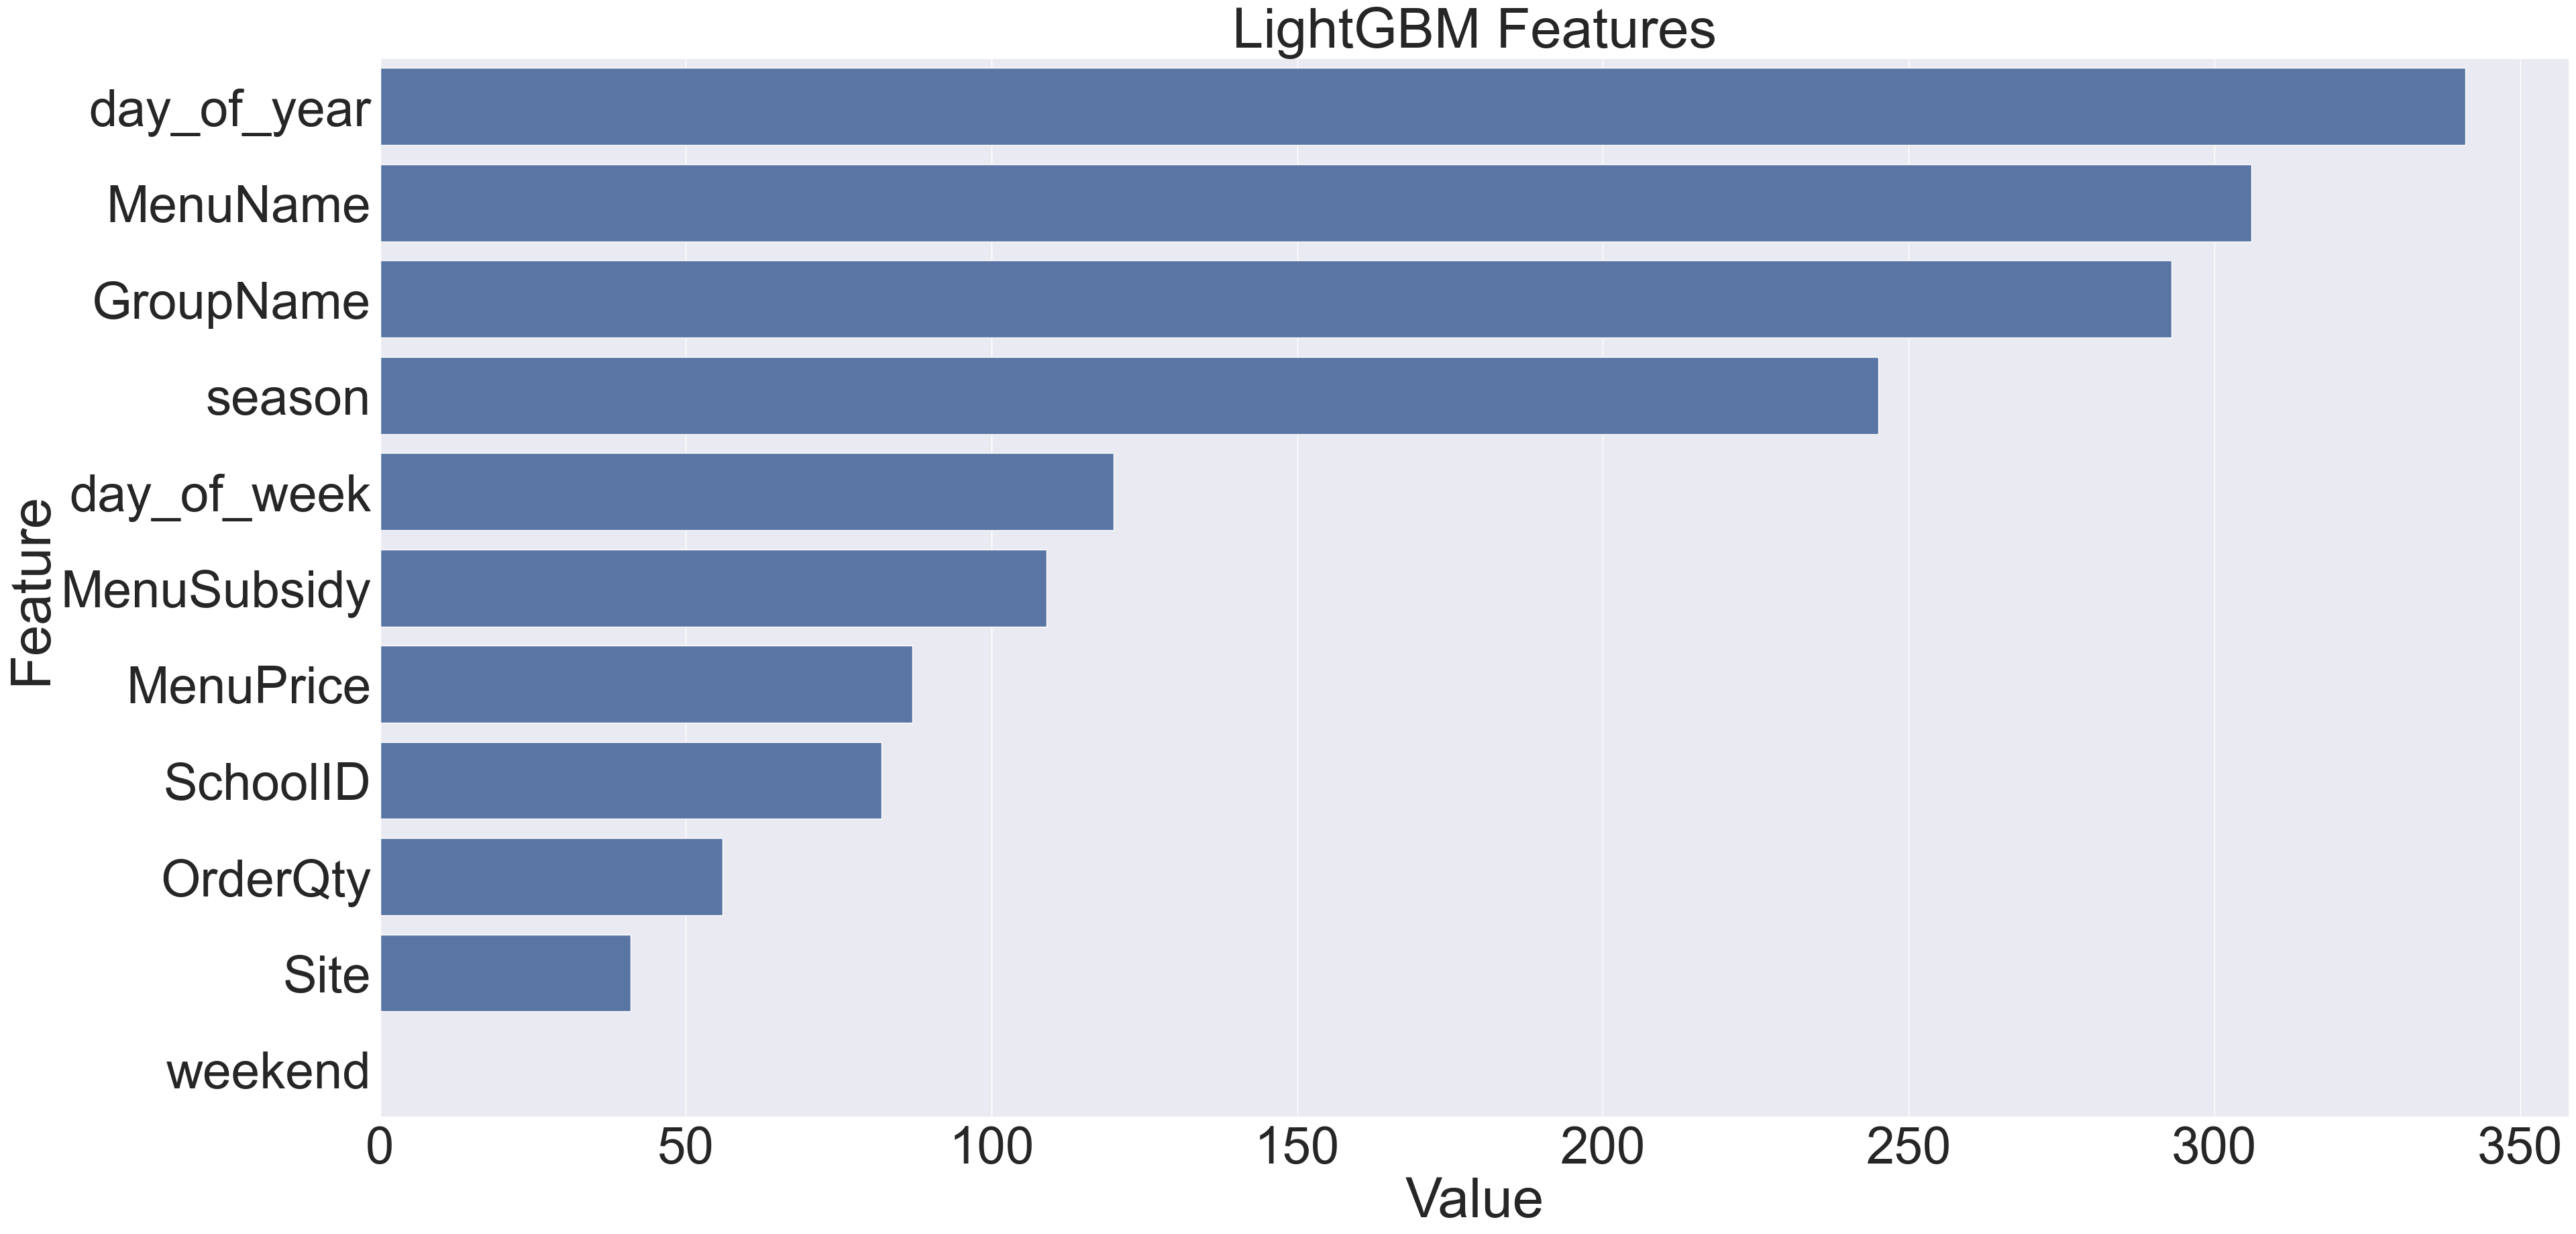

In [79]:
######plotting lightgbm feature importance
import matplotlib.pyplot  as plt
import seaborn as sns
def plotImp(model_l, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model_l.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features')
    plt.tight_layout()
    #plt.savefig('lgbm_importances-01.png')
    plt.show()

plotImp(model_l, X_val)

In [6]:
import numpy as np


######## memmory reduction method


def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max <                  np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df